In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from collections import OrderedDict, defaultdict

In [2]:
data = pd.read_csv("iris.csv")
data['species'],y = pd.factorize(data['species'])
data['species'] += 1

temp = data
for index,row in data.iterrows():
    if row['species'] == 2:
        temp['species'].iloc[index] = -1  
data = temp

C:\Users\Dhrumil\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [4]:
setosaData = data[0:49]
versicolorData = data[50:100]

training_data = setosaData[:math.floor (len(setosaData) * 0.7)] 
training_data = training_data.append(versicolorData[:math.floor (len(versicolorData) * 0.7)] )

testing_data = setosaData[math.floor (len(setosaData) * 0.7) : ] 
testing_data = testing_data.append(versicolorData[math.floor (len(versicolorData) * 0.7) : ] )

In [5]:
#Train Data
train_Y = training_data['species'].values
train_Y = train_Y.reshape((train_Y.shape[0],1))
train_X = training_data[['sepal_length','sepal_width','petal_length','petal_width']].values

#Test Data
test_Y = testing_data['species'].values
test_X = testing_data[['sepal_length','sepal_width','petal_length','petal_width']].values

train_X = np.asmatrix(train_X)
train_Y = np.asmatrix(train_Y)
test_X = np.asmatrix(test_X)
test_Y = np.asmatrix(test_Y)

In [6]:
n = np.size(train_X, 0)
alp = np.asmatrix(np.random.random_sample((n,1)))
m = np.size(train_X, 1)

maxiter = 100
C = 10
eta = 0.001
for it in range(maxiter):
    i = np.random.randint(0,n)
    sm = 0
    for j in range(n):
        sm += alp[j] * alp[i] * train_Y[j] * train_Y[i] * (train_X[j] * train_X[i].T)
    
    alp[i] += eta* (1-sm)
    alp[i] = max(0,min(alp[i],C))
    check = -1
    j = i
    while (check < 0):
        j = np.random.randint(0,n)
        if j != i:
            smt = 0
            for k in range(n):
                if k != j:
                    smt += alp[k] * train_Y[k]
                check = -train_Y[j] * smt
            alp[j] = check

In [7]:
w = np.asmatrix(np.zeros(4))
for j in range(n):
    w += alp[j] * train_Y[j] * train_X[j]

In [8]:
negsup = 100000000
pozsup = 100000000
for k in range(n):
    if train_Y[k] == 1:
        if w * train_X[k].T < negsup:
            re = w * train_X[k].T
            indneg = k
    else:
        if w * train_X[k].T < pozsup:
            re = w * train_X[k].T
            indpoz = k

b = -0.5*( w*train_X[indneg].T + w*train_X[indpoz].T )

In [9]:
def compute(W, b, test_X ):
    compute = np.dot(test_X,W.T) + b.T
    sign = np.copy(compute)
    compute[sign < 0] = -1
    compute[sign > 0] = 1
    return compute

In [10]:
predict_Y = compute(w,b,test_X)
predict_Y = np.squeeze( np.asarray(predict_Y) )
Y = np.squeeze(np.asarray(test_Y))

res=np.zeros(np.size(test_X,0))
acc=0
for k in range(len(predict_Y)):
    if predict_Y[k] == Y[k]:
        acc+=1
acc=acc/30
print(acc*100,"% is the acc")

100.0 % is the acc


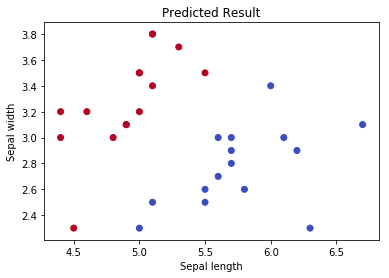

In [11]:
#fig.set_figwidth(16)
X = np.squeeze(np.asarray(test_X))
X = X[:, :2]  # we only take the first two features.

y = np.squeeze(np.asarray(predict_Y))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted Result')
plt.show()

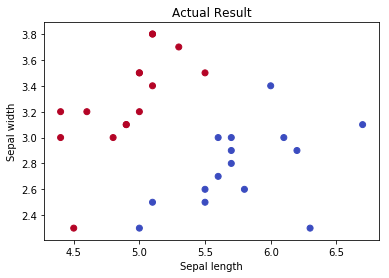

In [12]:
#fig.set_figwidth(16)
X = np.squeeze(np.asarray(test_X))
X = X[:, :2]  # we only take the first two features.

y = np.squeeze(np.asarray(test_Y))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Actual Result')
plt.show()